<a href="https://colab.research.google.com/github/fddfbbnln/Flight-Ticket-Price-Prediction-ML-Model/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
df1 = pd.read_excel('Data_Train.xlsx')
df1.to_csv('Data_Train.csv', index=False)

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [58]:
df2 = pd.read_csv('Data_Train.csv')
df2.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [59]:
df2.shape

(10683, 11)

In [60]:
df3 = df2.drop(['Date_of_Journey','Route','Arrival_Time','Duration','Additional_Info'],axis = 'columns')
df3.head(3)

,Airline,Source,Destination,Dep_Time,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,22:20,non-stop,3897
1,Air India,Kolkata,Banglore,05:50,2 stops,7662
2,Jet Airways,Delhi,Cochin,09:25,2 stops,13882


In [61]:
df3.isnull().sum()
df3.shape

(10683, 6)

In [62]:
df3.dropna(inplace = True)
df3.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Dep_Time,0
Total_Stops,0
Price,0


In [63]:
df3['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
df3['Stops'] = df3['Total_Stops'].apply(lambda x: 0 if x == 'non-stop' else int(x.split(' ')[0]))

In [65]:
df3.head(3)

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Stops
0,IndiGo,Banglore,New Delhi,22:20,non-stop,3897,0
1,Air India,Kolkata,Banglore,05:50,2 stops,7662,2
2,Jet Airways,Delhi,Cochin,09:25,2 stops,13882,2


In [66]:
df4 = df3.drop(['Total_Stops'],axis = 'columns')
df4.head(3)

,Airline,Source,Destination,Dep_Time,Price,Stops
0,IndiGo,Banglore,New Delhi,22:20,3897,0
1,Air India,Kolkata,Banglore,05:50,7662,2
2,Jet Airways,Delhi,Cochin,09:25,13882,2


In [67]:
df4.shape

(10682, 6)

In [68]:
df4['Stops'].unique()

array([0, 2, 1, 3, 4])

In [69]:
df4.Price.unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648])

In [70]:
df4.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [71]:
df4.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [72]:
df4.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [73]:
df4.Airline = df4.Airline.apply(lambda x: x.strip())
Airline_stats = df4.groupby('Airline')['Airline'].agg('count').sort_values(ascending=False)
Airline_stats

,Airline
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [74]:
len(Airline_stats[Airline_stats<=20])

4

In [75]:
Airline_stats_less_than_20 = Airline_stats[Airline_stats<=20]
len(df4.Airline.unique())

12

In [76]:
df4.Airline = df4.Airline.apply(lambda x: 'Other' if x in Airline_stats_less_than_20 else x)
len(df4.Airline.unique())

9

In [77]:
df4.shape

(10682, 6)

In [78]:
df4.Price.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [94]:
def remove_p_outliers(df4):
    df_out = pd.DataFrame()
    for key, subdf in df4.groupby('Airline'):
        m = np.mean(subdf.Price)
        st = np.std(subdf.Price)
        reduced_df = subdf[(subdf.Price>(m-st)) & (subdf.Price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5 = remove_p_outliers(df4)
print(df5.head(3))

    Airline    Source Destination Dep_Time  Price  Stops
0  Air Asia  Banglore       Delhi    23:55   4483      0
1  Air Asia   Kolkata    Banglore    10:20   4409      0
2  Air Asia   Kolkata    Banglore    10:20   5216      0


In [96]:
df5.shape

(8025, 6)

In [97]:
df5.Price.describe()

,Price
count,8025.000000
mean,8885.573458
std,3548.253439
min,2647.000000
25%,5644.000000
50%,8610.000000
75%,11989.000000
max,15864.000000


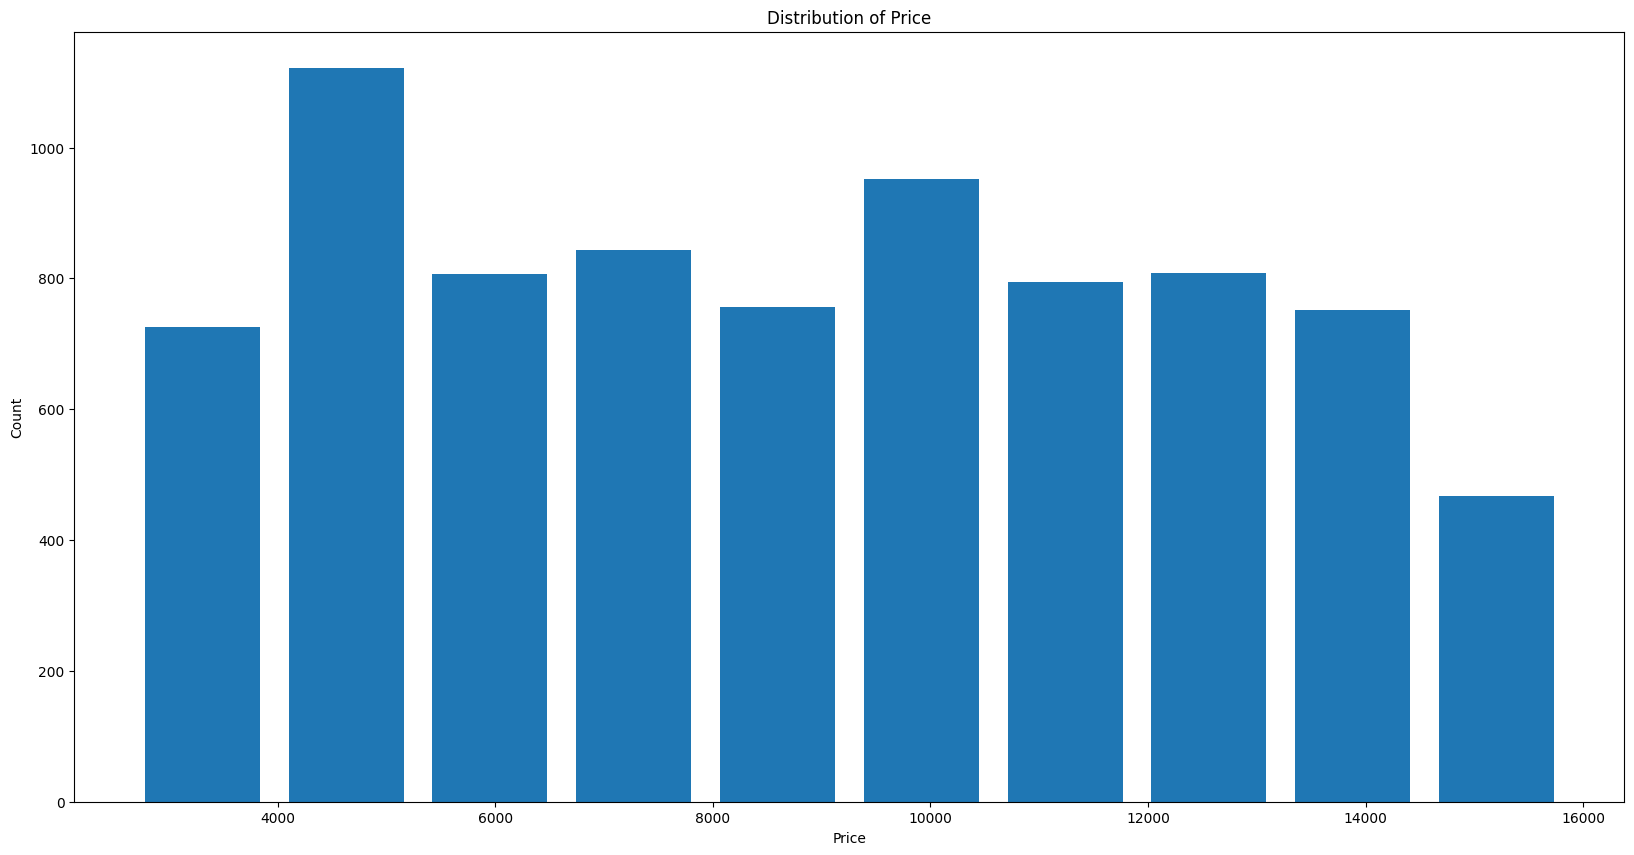

In [95]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df5.Price,rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

In [98]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      8025 non-null   object
 1   Source       8025 non-null   object
 2   Destination  8025 non-null   object
 3   Dep_Time     8025 non-null   object
 4   Price        8025 non-null   int64 
 5   Stops        8025 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 376.3+ KB


In [153]:
Airline_le = LabelEncoder()
Source_le = LabelEncoder()
Destination_le = LabelEncoder()
Dep_Time_le = LabelEncoder()
df5['Airline'] = Airline_le.fit_transform(df5['Airline'])
df5['Source'] = Source_le.fit_transform(df5['Source'])
df5['Destination'] = Destination_le.fit_transform(df5['Destination'])
df5['Dep_Time'] = Dep_Time_le.fit_transform(df5['Dep_Time'])

In [154]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Airline      8025 non-null   int64
 1   Source       8025 non-null   int64
 2   Destination  8025 non-null   int64
 3   Dep_Time     8025 non-null   int64
 4   Price        8025 non-null   int64
 5   Stops        8025 non-null   int64
dtypes: int64(6)
memory usage: 376.3 KB


In [155]:
X = df5.drop(['Price'],axis = 'columns')
X.head(3)

,Airline,Source,Destination,Dep_Time,Stops
0,0,0,2,208,0
1,0,3,0,74,0
2,0,3,0,74,0


In [156]:
y = df5.Price
y.head(3)

,Price
0,4483
1,4409
2,5216


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [158]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.8146787073735448

In [170]:
def predict_price(Airline, Source, Destination, Dep_Time, Stops):
    loc_index = np.where((X.columns == Airline) & (X.columns == Source) & (X.columns == Destination) & (X.columns == Dep_Time) [0] [0])
    x=np.zeros(len(X.columns))
    x [0] = Stops
    if loc_index>=0:
      x[loc_index] = 1
      return rf_clf.predict([x])[0]

In [171]:
print (X.columns)

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Stops'], dtype='object')


In [201]:
predict_price ('GoAir','Banglore','Kolkata','18:40',2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(12676.587996392496)